In [1]:
!pip install pillow matplotlib



In [2]:
import os
import shutil
import random
import zipfile
from PIL import Image
import matplotlib.pyplot as plt


In [5]:
zip_path = r"C:\Users\Radhi\Desktop\INFOSYS\safety_ai.zip"
extract_path = "dataset"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted files to:", extract_path)



✅ Extracted files to: dataset


In [6]:
for root, dirs, files in os.walk(extract_path):
    print(root, "->", len(files), "files")


dataset -> 0 files
dataset\css-data -> 2 files
dataset\css-data\test -> 0 files
dataset\css-data\test\images -> 82 files
dataset\css-data\test\labels -> 82 files
dataset\css-data\train -> 0 files
dataset\css-data\train\images -> 2605 files
dataset\css-data\train\labels -> 2605 files
dataset\css-data\valid -> 0 files
dataset\css-data\valid\images -> 114 files
dataset\css-data\valid\labels -> 114 files
dataset\results_yolov8n_100e -> 0 files
dataset\results_yolov8n_100e\kaggle -> 0 files
dataset\results_yolov8n_100e\kaggle\working -> 3 files
dataset\results_yolov8n_100e\kaggle\working\runs -> 0 files
dataset\results_yolov8n_100e\kaggle\working\runs\detect -> 0 files
dataset\results_yolov8n_100e\kaggle\working\runs\detect\train -> 23 files
dataset\results_yolov8n_100e\kaggle\working\runs\detect\train\weights -> 2 files
dataset\source_files -> 0 files
dataset\source_files\source_files -> 9 files


In [9]:
IMAGE_DIR = "dataset/train/images"
ANNOT_DIR = "dataset/train/labels"

OUTPUT_IMG_DIR = "cleaned_images"
OUTPUT_ANN_DIR = "cleaned_labels"

os.makedirs(OUTPUT_IMG_DIR, exist_ok=True)
os.makedirs(OUTPUT_ANN_DIR, exist_ok=True)




In [12]:
IMAGE_DIR = "dataset/css-data/train/images"
ANNOT_DIR = "dataset/css-data/train/labels"
OUTPUT_IMG_DIR = "cleaned_images"
OUTPUT_ANN_DIR = "cleaned_labels"

os.makedirs(OUTPUT_IMG_DIR, exist_ok=True)
os.makedirs(OUTPUT_ANN_DIR, exist_ok=True)

bad_images = []

for img_file in os.listdir(IMAGE_DIR):
    img_path = os.path.join(IMAGE_DIR, img_file)
    try:
        img = Image.open(img_path)
        img.verify()
    except Exception as e:
        print("Corrupt:", img_file, e)
        bad_images.append(img_file)

print("✅ Total bad images:", len(bad_images))


✅ Total bad images: 0


In [13]:
def is_valid_label(line):
    parts = line.strip().split()
    if len(parts) != 5:
        return False
    try:
        cls, x, y, w, h = parts
        x, y, w, h = float(x), float(y), float(w), float(h)
        if not (0 <= x <= 1 and 0 <= y <= 1 and 0 < w <= 1 and 0 < h <= 1):
            return False
        return True
    except:
        return False

for lbl_file in os.listdir(ANNOT_DIR):
    with open(os.path.join(ANNOT_DIR, lbl_file), "r") as f:
        lines = f.readlines()

    clean_lines = [line for line in lines if is_valid_label(line)]

    if clean_lines:
        with open(os.path.join(OUTPUT_ANN_DIR, lbl_file), "w") as f:
            f.writelines(clean_lines)


In [14]:
for img_file in os.listdir(IMAGE_DIR):
    if img_file not in bad_images:
        shutil.copy(os.path.join(IMAGE_DIR, img_file), OUTPUT_IMG_DIR)


In [15]:
print("Cleaned images:", len(os.listdir(OUTPUT_IMG_DIR)))
print("Cleaned labels:", len(os.listdir(OUTPUT_ANN_DIR)))


Cleaned images: 2605
Cleaned labels: 2599


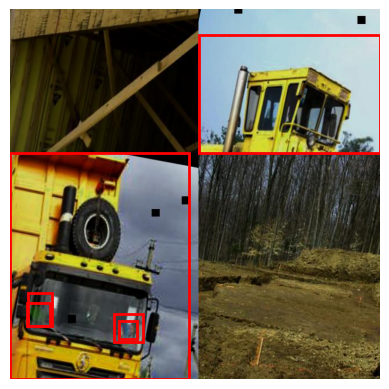

In [16]:
def plot_image_with_boxes(img_path, label_path):
    img = Image.open(img_path)
    W, H = img.size
    plt.imshow(img)
    ax = plt.gca()

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                cls, x, y, w, h = line.strip().split()
                x, y, w, h = float(x), float(y), float(w), float(h)
                # convert YOLO (center, width, height) to pixel coords
                xmin = (x - w/2) * W
                ymin = (y - h/2) * H
                box_w = w * W
                box_h = h * H
                rect = plt.Rectangle((xmin, ymin), box_w, box_h,
                                     fill=False, edgecolor="red", linewidth=2)
                ax.add_patch(rect)
    plt.axis("off")
    plt.show()

# Pick random sample
sample_img = random.choice(os.listdir(OUTPUT_IMG_DIR))
plot_image_with_boxes(
    os.path.join(OUTPUT_IMG_DIR, sample_img),
    os.path.join(OUTPUT_ANN_DIR, sample_img.replace(".jpg", ".txt"))
)
